# Ligand preparation

# Step 1: Installation of dependencies

Please install the following packages:
* `PDBFixer`
* `Biopython`
* `MDAnalysis`
* `RDKit`
* `OpenMM` (and `OpenMMForceFields`)
* `OpenBabel`
* `Scrubber` (package: "`molscrub`")
* `py3Dmol`
* `rdkit utils`

In [17]:
import subprocess
subprocess.run(['pip', 'install', 'rdkit', 'openmm', 'mdanalysis', 'molscrub', 'py3dmol', 'biopython'])

CompletedProcess(args=['pip', 'install', 'rdkit', 'openmm', 'mdanalysis', 'molscrub', 'py3dmol', 'biopython'], returncode=0)

In [ ]:
#!pip install rdkit openmm mdanalysis molscrub py3dmol biopython
#!pip install pdbfixer

In [ ]:
#!pip install molscrub

In [ ]:
#!curl -L -O https://raw.githubusercontent.com/MolSSI-Education/iqb-2025/main/util.py

In [ ]:
# Run this cell if pdbfixer could not be installed on colab
#!pip install git+https://github.com/openmm/pdbfixer.git

If running on colab, upload the following file:

In [ ]:
# If using google colab please upload the following files: test1.csv and {pdb_id}_A.pdb
#from google.colab import files

# Upload a {pdb_id}.pdb file from local PC to your Colab VM
#files.upload("molecular_docking/protein_files")

In [ ]:
# Upload a csv file containing multiple SMILES from local PC to your Colab VM
#files.upload("molecular_docking/ligand_structures")

# Step 2 Building Atomistic Ligand Model

## Step 2.1 Set protein and ligand directories

In [38]:
import os
import requests

pdb_id = input("Enter PDB code: ") # The Protein ID we're looking at

# Set protein directory
protein_directory = "molecular_docking/protein_files"
protein_filename = f"{pdb_id}_A.pdb"
protein_filepath = os.path.join(protein_directory, protein_filename)

# Set ligand directory
ligand_directory = "molecular_docking/ligand_structures"
ligand_filename = ""
ligand_filepath = os.path.join(ligand_directory, ligand_filename)

# Actually make the directory, the exist_ok flag lets the command execute even if the folder already exists. It does NOT overwrite existing data.
os.makedirs(protein_directory, exist_ok=True)
os.makedirs(ligand_directory, exist_ok=True)

print("Protein directory: The following folder has been created: ", protein_filepath)
print("Ligand directory: The following folder has been created: ", ligand_filepath)

Enter PDB code:  7JVM


Protein directory: The following folder has been created:  molecular_docking/protein_files\7JVM_A.pdb
Ligand directory: The following folder has been created:  molecular_docking/ligand_structures\


## Step 2.2 Determine residues nearby the ligand with MDAnalysis

In [39]:
import MDAnalysis as mda

# Load the original PDB
u = mda.Universe(f"{protein_directory}/{pdb_id}_A.pdb")

# Select atoms using the MDAnalysis selection language
ligand_select = "segid A and record_type HETATM and not resname HOH"
ligand = u.select_atoms(ligand_select)

# Find and residues within a certain distance from the ligand
active_site = u.select_atoms(f"around 3.5 group ligand and segid A",
                             periodic=False,
                             ligand=ligand)  # Uses generic select_name=object as kwargs
print("The residues of the active are: ", active_site.residues.resids)
print(ligand.residues.resids)

The residues of the active are:  [ 32  34  35  36  42 108 110 111 113 138 140 217 219 250 253 254 491 492
 702 740 753 787 793]
[601 602 603 604]


## Step 2.3 Select ligand bound in PDB structure

In [40]:
import numpy as np

ligands = u.select_atoms("not protein and not water")
i = -1 # index
ligand_residue_names = ligands.residues.resnames

# Loop through all ligands present and prints out their code
print("The following ligands have been found (index code): ")
for lig in ligand_residue_names:
  i = i+1
  print(i, lig)

# Select the index of your ligand of interest
ligand_id = np.unique(ligand_residue_names)[int(input('Enter index of ligand of interest: '))]
#ligand_id = np.unique(ligand_residue_names)[1]
print(f"You have selected {ligand_id} as your ligand.")

The following ligands have been found (index code): 
0 VKS
1 PO4
2 PO4
3 PO4


Enter index of ligand of interest:  1


You have selected VKS as your ligand.


## Step 2.4 Download the ideal ligand from the RCSB

print("An ideal ligand is a ligand that was extracted from the original PDB file with correct 3D coordinates and is needed: \
        1. to align the pose of the extracted ligand with ideal ligand \
        2. to obtain the correct 3D coordinates for generating the docking grid box \
        The ideal ligand file can be found on https://www.rcsb.org/. Search for the desired PDB and scroll down to small molecule section, \
        left-click on scroll-down menu Download instance coordinates, select the option with [auth A]. \
        For example, for the PDB id 7BCS the ideal ligand can be downloaded  at \
        https://models.rcsb.org/v1/7bcs/ligand?auth_seq_id=601&label_asym_id=D&encoding=sdf&filename=7bcs_D_TJ5.sdf \
        Please rename the file to {ligand_id}_ideal.sdf, e.g. 7bcs_D_TJ5.sdf ===> TJ5_ideal.sdf"
    )


In [41]:
# The following cell executes the code for downloading the ideal ligand, 
# i.e. the co-crystallized ligand extracted from the PDB structure.
# An ideal ligand is needed:
# 1. align the pose of the extracted ligand with ideal ligand
# 2. obtain the correct 3D coordinates for generating the docking grid box

ligand_directory = "molecular_docking/ligand_structures"
os.makedirs(ligand_directory, exist_ok=True)

ideal_ligand_filename = f"{ligand_id}_ideal.sdf"
print(f"Downloading ligand {ligand_id}...")
ligand_url = f"https://files.rcsb.org/ligands/download/{ideal_ligand_filename}"
ligand_request = requests.get(ligand_url)
ligand_request.raise_for_status() # Check for errors

ideal_filepath = f"{ligand_directory}/{ideal_ligand_filename}"

with open(ideal_filepath, "w") as f:
    f.write(ligand_request.text)
print(f"Saved ligand to {ideal_filepath}")

Saved ligand to molecular_docking/ligand_structures/VKS_ideal.sdf


In [ ]:
# Run in colab only
#ligand_directory = "molecular_docking/ligand_structures"
#os.makedirs(ligand_directory, exist_ok=True)

# Upload  from local PC to your Colab VM
#files.upload("molecular_docking/ligand_structures")

## Step 2.5 Split the ligand out into its own PDB file from the experimental one

In [42]:
# Split the ligand out into its own PDB file from the experimental one
single_pose_ligand = ligand.select_atoms("segid A")
single_pose_ligand.write(f"{ligand_directory}/{ligand_id}_fromPDB.pdb")
print("Ligand extracted from original PDB!")

Ligand extracted from original PDB!


# Step 3 Ligand preparation - Extracted ligand

## Step 3.1 Rdkit - Partial preparation and correcting the pose of extracted ligand

In [43]:
# The following cell executes the code to partially prepare and correct the 3D orientation (pose) of the extracted ligand,
# and save it as {ligand_id}_corrected_pose.sdf which will be later used to generate a grid box for docking.

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

print("Fixing and correcting the pose of extracted ligand...")
# Load and remove the hydrogens that we can't map anyways yet.
ideal_mol = Chem.MolFromMolFile(f"{ligand_directory}/{ligand_id}_ideal.sdf", removeHs=True)
pose_mol = Chem.MolFromPDBFile(f"{ligand_directory}/{ligand_id}_fromPDB.pdb", removeHs=True)

# Disconnect any organometal
rdMolStandardize.DisconnectOrganometallicsInPlace(pose_mol)

# Remove disconnected fragments
fragmenter = rdMolStandardize.FragmentRemover()
pose_mol_f = fragmenter.remove(pose_mol)

# Choose largest fragment
chooser = rdMolStandardize.LargestFragmentChooser()
pose_mol_lf = chooser.choose(pose_mol_f)

# Set options: include tetrahedral and double bond stereoisomers
options = StereoEnumerationOptions(tryEmbedding=True, onlyUnassigned=False)

# Assign bond orders from the template to the pose molecule
corrected_pose = AllChem.AssignBondOrdersFromTemplate(ideal_mol, pose_mol_lf)

# Add hydrogens
corrected_pose_with_H = Chem.AddHs(corrected_pose, addCoords=True)

# Sanity to check to make sure the molecule is right (check smiles of both)
#assert Chem.MolToSmiles(corrected_pose) == Chem.MolToSmiles(ideal_mol)

# Save the corrected pose to an SDF file
ligand_corrected_pose_file = f"{ligand_directory}/{ligand_id}_corrected_pose.sdf"
writer = Chem.SDWriter(ligand_corrected_pose_file)
writer.write(corrected_pose_with_H)
writer.close()
print("Extracted ligand fixed!")

Fixing and correcting the pose of extracted ligand...
Extracted ligand fixed!


[14:28:05] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[14:28:05] Initializing MetalDisconnector
[14:28:05] Running MetalDisconnector
[14:28:05] Running FragmentRemover
[14:28:05] Running LargestFragmentChooser
[14:28:05] Fragment: C[C@@H]1OCC2(CCN([C@@H]3CN[C@H](S[C@H]4CCNC(N)[C@@H]4Cl)C(N)N3)CC2)[C@@H]1N
[14:28:05] New largest fragment: C[C@@H]1OCC2(CCN([C@@H]3CN[C@H](S[C@H]4CCNC(N)[C@@H]4Cl)C(N)N3)CC2)[C@@H]1N (64)
[14:28:05] Fragment: O[PH](O)(O)O
[14:28:05] Fragment: O[PH](O)(O)O
[14:28:05] Fragment: O[PH](O)(O)O
[14:28:05] WARNING: More than one matching pattern found - picking one



In [44]:
# Comparison of SMILES of prepared extracted ligand with ideal ligand
print(Chem.MolToSmiles(corrected_pose))
print(Chem.MolToSmiles(pose_mol_lf))
print(Chem.MolToSmiles(ideal_mol))

C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N
C[C@@H]1OCC2(CCN([C@@H]3CN[C@H](S[C@H]4CCNC(N)[C@@H]4Cl)C(N)N3)CC2)[C@@H]1N
C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N


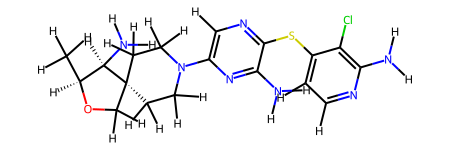

In [45]:
# Check our molecule from RDKit. Doesn't have rotation, but its neat to see in a Jupyter Notebook for just invoking it
from rdkit.Chem import AllChem, Draw

AllChem.Compute2DCoords(corrected_pose_with_H)
Draw.MolToImage(corrected_pose_with_H)

corrected_pose_with_H

In [46]:
# Check results
print("Corrected pose SMILES:", Chem.MolToSmiles(corrected_pose_with_H))

supp = Chem.SDMolSupplier(f"{ligand_directory}/{ligand_id}_corrected_pose.sdf")

for mol in supp:
    if mol is not None:
        print("Corrected mols: ", Chem.MolToSmiles(mol))

print("Ideal mol SMILES:", Chem.MolToSmiles(ideal_mol))

u.select_atoms("segid A")

Corrected pose SMILES: [H]c1nc(Sc2c([H])c([H])nc(N([H])[H])c2Cl)c(N([H])[H])nc1N1C([H])([H])C([H])([H])C2(C([H])([H])O[C@@]([H])(C([H])([H])[H])[C@@]2([H])N([H])[H])C([H])([H])C1([H])[H]
Corrected mols:  C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N
Ideal mol SMILES: C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N


<AtomGroup with 4162 atoms>

## Step 3.2 Creating tautomers (optional)

In [47]:
from rdkit.Chem.MolStandardize import rdMolStandardize
print("Generating tautomers...")
# Initialize enumerator
tautomer_enumerator = rdMolStandardize.TautomerEnumerator()
# Provide RDKit Mol object to generate.
# We already made this, but you may start from a SMILE string or other source
# Remember, use the structure with implicit hydrogens!
tautomers = tautomer_enumerator.Enumerate(corrected_pose)
# Take the TautomerEnumerationResults object and iterate over to get a list of structures
tautomers_list = [t for t in tautomers]

'''
Note! This may generate duplicate structures,
You may want to cast these Mol objects into SMILES strings, de-duplicate,
then rebuild the Mol objects to map their coordinates back onto the reference structure
'''

# Cast to a set to make unique, then back to a list (as some tautomers can be enumerated again for some structures)
smiles_set_tautomers = set(Chem.MolToSmiles(t) for t in tautomers_list)
tautomer_list_unique = list(smiles_set_tautomers)
# We know the ligand structure does have unique tautomers, this is just a sanity check
assert len(tautomers_list) == len(tautomer_list_unique)

Generating tautomers...


In [48]:
ligand_tautomers = f"{ligand_directory}/{ligand_id}_tautomers.sdf"
writer = Chem.SDWriter(ligand_tautomers)
for t in tautomers_list:
  writer.write(t)
writer.close()
print(f"Tautomers of {ligand_id}mhave been generated and saved as {ligand_id}_tautomers.sdf")

Tautomers of VKSmhave been generated and saved as VKS_tautomers.sdf


In [49]:
for t in tautomer_list_unique:
  print(t)

C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N
C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(=N)[nH]3)CC2)[C@@H]1N
C[C@@H]1OCC2(CCN(c3cnc(Sc4cc[nH]c(=N)c4Cl)c(=N)[nH]3)CC2)[C@@H]1N
C[C@@H]1OCC2(CCN(c3cnc(Sc4cc[nH]c(=N)c4Cl)c(N)n3)CC2)[C@@H]1N


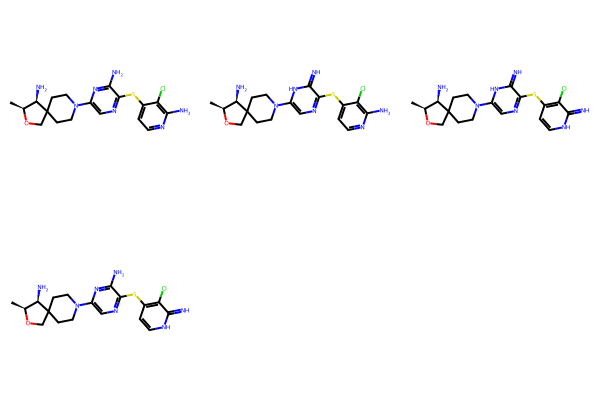

In [50]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([Chem.MolFromSmiles(t) for t in tautomer_list_unique])

## Step 3.3 Execute Scrubber to prepare extracted ligand

In [52]:
from rdkit import Chem
from molscrub import Scrub
import subprocess


print("Initiating scrubber...")
cmd = f"""scrub.py {ligand_directory}/{ligand_id}_corrected_pose.sdf -o {ligand_directory}/{ligand_id}.sdf"""

#!{cmd}
subprocess.run(cmd, shell=True)

# Create our PDBQT to keep our hydrogens
ligand_pdbqt_filename = f"{ligand_directory}/{ligand_id}.pdbqt"
os.system(f"obabel {ligand_corrected_pose_file} -O {ligand_pdbqt_filename} -xh")
print(f"Ligand has been scrubbed and saved as {ligand_id}.pdbqt")
print(f"{ligand_id}.pdbqt is ready for docking!")

Initiating scrubber...
Ligand has been scrubbed and saved as VKS.pdbqt
VKS.pdbqt is ready for docking!


In [ ]:
# When using colab run this cell instead
#from rdkit import Chem
#from molscrub import Scrub

#cmd = f"""scrub.py {ligand_directory}/{ligand_id}_corrected_pose.sdf -o {ligand_directory}/{ligand_id}.sdf"""

#!{cmd}

# Create our PDBQT to keep our hydrogens
#ligand_pdbqt_filename = f"{ligand_directory}/{ligand_id}.pdbqt"
#os.system(f"obabel {ligand_corrected_pose_file} -O {ligand_pdbqt_filename} -xh")

In [53]:
# Check results
print("Corrected pose SMILES:", Chem.MolToSmiles(corrected_pose_with_H))

supp = Chem.SDMolSupplier(f"{ligand_directory}/{ligand_id}.sdf")
i = 0

for mol in supp:
    if mol is not None:
        i += 1
        print(f"Tautomer mol {i}: ", Chem.MolToSmiles(mol))

print("Ideal mol smile:", Chem.MolToSmiles(ideal_mol))

u.select_atoms("segid A")

Corrected pose SMILES: [H]c1nc(Sc2c([H])c([H])nc(N([H])[H])c2Cl)c(N([H])[H])nc1N1C([H])([H])C([H])([H])C2(C([H])([H])O[C@@]([H])(C([H])([H])[H])[C@@]2([H])N([H])[H])C([H])([H])C1([H])[H]
Tautomer mol 1:  C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1[NH3+]
Tautomer mol 2:  C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(=N)[nH]3)CC2)[C@@H]1[NH3+]
Tautomer mol 3:  C[C@@H]1OCC2(CCN(c3cnc(Sc4cc[nH]c(=N)c4Cl)c(N)n3)CC2)[C@@H]1[NH3+]
Tautomer mol 4:  C[C@@H]1OCC2(CCN(c3cnc(Sc4cc[nH]c(=N)c4Cl)c(=N)[nH]3)CC2)[C@@H]1[NH3+]
Ideal mol smile: C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)CC2)[C@@H]1N


<AtomGroup with 4162 atoms>

In [ ]:
# Voila! The ligand is ready for docking!

# Step 4 Ligand preparation - multiple ligands

## Step 4.1 Load the SMILES strings into RDKit and write back out an SDF file

In [54]:
# Default delimiter is tab (\t), so we need to specify ","
print("Initiating multiple ligand docking...")
print("Loading SMILES from csv file...")
smiles_supplier = Chem.SmilesMolSupplier(f"{ligand_directory}/ligands_to_dock.csv", delimiter=",")
mols = []  # Could do this in list comprehension, adding a sanity check
for mol in smiles_supplier:
  print(Chem.MolToSmiles(mol))  # Sanity check that we got the smiles strings and not metadata
  mols.append(mol)

# Write out our molecules
ligands_to_dock_dirty = f"{ligand_directory}/ligands_to_dock_dirty.sdf"
writer = Chem.SDWriter(ligands_to_dock_dirty)
for m in mols:
  writer.write(m)
writer.close()
print("SMILES from csv file were saved as ligands_to_dock.sdf")

Initiating multiple ligand docking...
Loading SMILES from csv file...
O=C(O[C@@H]1C[NH2+][C@H](C(=O)[O-])C1)c1ccc(-c2ccccc2)cc1
Cc1cccc(COc2ccccc2CN(CC[C@@H](N)C(=O)O)Cc2ccccc2OCc2cccc(C)c2)c1
Cc1cccc(COc2cccc3c2CN(CC[C@@H](N)C(=O)O)Cc2c(OCc4cccc(C)c4)cccc2-3)c1
COc1cccc2c1CN(CC[C@@H](N)C(=O)O)Cc1c(OC)cccc1-2
SMILES from csv file were saved as ligands_to_dock.sdf


[14:29:31] WARNING: no name column found on line 1
[14:29:31] WARNING: no name column found on line 2
[14:29:31] WARNING: no name column found on line 3
[14:29:31] WARNING: no name column found on line 4


## Step 4.2 Execute Scrubber to prepare multiple ligands

In [55]:
print("Initiating scrubber...")
cmd = f"""scrub.py {ligand_directory}/ligands_to_dock_dirty.sdf -o {ligand_directory}/ligands_to_dock.sdf"""

subprocess.run(cmd, shell=True)
#!{cmd}

print("ligands_to_dock.sdf is ready for docking!")
print(f"Summary: {ligand_id}_ideal.sdf, {ligand_id}_corrected_pose.sdf and ligands_to_dock.sdf have been generated and are ready for docking!") 

Initiating scrubber...
ligands_to_dock.sdf is ready for docking!
Summary: VKS_ideal.sdf, VKS_corrected_pose.sdf and ligands_to_dock.sdf have been generated and are ready for docking!


In [ ]:
# Sanity check we got a structure with hydrogens
# RDKit automatically removes hydrogens by default (needed for most of the kit to work)
# But we're explicitly looking for them here, we can just load them and check
supplier = Chem.SDMolSupplier(f"{ligand_directory}/ligands_to_dock.sdf", removeHs=True)
reloaded_ligands = [mol for mol in supplier]
# The last structure will be the same as the last in list comprehension above
reloaded_ligands[-1]

In [ ]:
# Voila! The ligands are ready for docking!